<div style="background:black">
    <center>
<img src="./images/session3/title.png" alt="Title"/>
    </center>
</div>


<div class="alert alert-block alert-success">
<center>
Today's objectives:<br/><br/>
    </center>
    &#x25a2; Get familiar with <b>supervised classification</b><br/>
    &#x25a2; Try <b>Spark's MLlib classification</b> library <br/>
    &#x25a2; Apply supervised classification to <b>network intrusion detection</b><br/>
    &#x25a2; Practice with Spark <b>DataFrames</b>
</div>


# Principles of supervised classification

See slides [here](pdf/session3/classification.pdf)

# Supervised classification in Spark

  <div class="alert alert-block alert-info">
    <center>
Spark has a rich API for Classification and Regression, described <a href="https://spark.apache.org/docs/latest/ml-classification-regression.html">here<a>
        </center>
        </div>

We will go through an example adapted from https://spark.apache.org/docs/latest/ml-classification-regression.html

In [48]:
# A little magic to adjust the config at Ericsson
import os
os.environ["IPYTHON"]="1"
#os.environ["PYSPARK_PYTHON"]="/usr/bin/python3"
os.environ["PYSPARK_PYTHON"]="C:\\ProgramData\\Anaconda3\\python.exe"
os.environ["PYSPARK_DRIVER_PYTHON"]="ipython3"
os.environ["PYSPARK_DRIVER_PYTHON_OPTS"]="notebook"
#os.environ["JAVA_HOME"]="/usr/lib/jvm/default-java"
os.environ["JAVA_HOME"]="C:\\Program Files\\Java\\jdk1.8.0_202"

In [49]:
# Create Spark session
from pyspark.sql import SparkSession
spark = SparkSession \
        .builder \
        .appName("Python Spark SQL basic example") \
        .getOrCreate()

The data is already prepared for MLlib:

In [50]:
# Load and parse the data file, converting it to a DataFrame.
data = spark.read.format("libsvm").load("data/session3/sample_libsvm_data.txt")

# Convert to Pandas for better visualization in notebook
import pandas as pd
pd.set_option('display.max_columns', None)
data.toPandas()

,label,features
0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...
95,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
96,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
97,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
98,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


Once data is prepared, first step is to split the training and test sets:

In [51]:
# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3], seed=123)

print(f'Dataset has {data.count()} elements')
print(f'Training set has {trainingData.count()} elements')
print(f'Test set has {testData.count()} elements')

Dataset has 100 elements
Training set has 71 elements
Test set has 29 elements


  <div class="alert alert-block alert-info">
    <center>
    The <b>Pipeline</b> is an important element of MLlib, containing the various transformations and models applied to the data.
    </center>
    </div>
    <a id="pipeline"></a>

In [52]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier

# Define a RandomForest model.
rf = RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=10)

# Chain data preparation and forest in a Pipeline
pipeline = Pipeline(stages=[rf])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "label", "features").show(5)

+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       1.0|  0.0|(692,[100,101,102...|
|       0.0|  0.0|(692,[123,124,125...|
|       0.0|  0.0|(692,[124,125,126...|
|       0.0|  0.0|(692,[124,125,126...|
|       0.0|  0.0|(692,[124,125,126...|
+----------+-----+--------------------+
only showing top 5 rows



<ul style="list-style-image: url('images/do.png');">
<li>Using your knowledge the DataFrame API, compute the accuracy of this classifier on the test set:</li>
</ul>


In [53]:
print(predictions.count())
correct = predictions.where(predictions['label'] == predictions['prediction']).count()
incorrect = predictions.where(predictions['label'] != predictions['prediction']).count()
accuracy = correct/(correct+incorrect)
print(f'Accuracy: {round(accuracy,2)}')

29
Accuracy: 0.97


# Quiz


<div class="alert alert-block alert-warning">
Deep Learning can be used for supervised classification:
    
&#x25a2; True

&#x25a2; False

</div>

<div class="alert alert-block alert-warning">
Deep Learning can be used for supervised classification:
    
&#x2611; True

&#x25a2; False

</div>

Deep neural networks, the main concept of Deep Learning, can be used for classification and regression. In Spark, neural networks are available in the [Multilayer Perceptron Classifier](https://spark.apache.org/docs/latest/ml-classification-regression.html#multilayer-perceptron-classifier). In practice, frameworks such as Pytorch or Tensorflow are often preferred to Spark for Deep Learning, due to their optimizations.

<div class="alert alert-block alert-info">

Decision trees can be used for regression:
    
&#x25a2; True

&#x25a2; False

</div>

<div class="alert alert-block alert-info">

Decision trees can be used for regression:
    
&#x2611; True

&#x25a2; False

</div>

In this case, tree leaves are associated with values instead of classes. Random Forests can also be used for regression.

<div class="alert alert-block alert-warning">
Classifiers in Spark's MLlib are all parallelized, they could leverage a computing cluster:
    
&#x25a2; True

&#x25a2; False

</div>

<div class="alert alert-block alert-warning">
Classifiers in Spark's MLlib are all parallelized, they could leverage a computing cluster:
    
&#x2611; True

&#x25a2; False

</div>

# Mini-project: network intrusion detection

<center>
<div class="alert alert-block alert-info">
    <b>Goal</b>: predict if a network connection is an attack
    </div>
    </center>

## Data inspection

Data: US Air Force LAN data ([link](https://www.kaggle.com/sampadab17/network-intrusion-detection)), available in <code>data/session3/network_data.csv</code>

In [54]:
! head data/session3/network_data.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


## Data loading

<ul style="list-style-image: url('images/do.png');">
    <li>Load the dataset as a Spark DataFrame:</li>
</ul>

In [55]:
import pandas
pandas.set_option('display.max_rows', 10)

# Create Spark session
from pyspark.sql import SparkSession
spark = SparkSession \
        .builder \
        .appName("Python Spark SQL basic example") \
        .getOrCreate()

In [56]:
# Read CSV data in a DataFrame
filename = 'data/session3/network_data.csv'
data = spark.read.option("header","true").csv(filename)

data.toPandas()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,1,0,0,150,25,0.17,0.03,0.17,0,0,0,0.05,0,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0,0,0,0,0.08,0.15,0,255,1,0,0.6,0.88,0,0,0,0,0,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1,1,0,0,0.05,0.07,0,255,26,0.1,0.05,0,0,1,1,0,0,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0,0,1,0,0,30,255,1,0,0.03,0.04,0.03,0.01,0,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0,0,0,0,1,0,0.09,255,255,1,0,0,0,0,0,0,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,7,0,0,1,1,0.07,0.07,0,255,7,0.03,0.06,0,0,0,0,1,1,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,39,1,0,1,0.18,0,0,0,0,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105,7,0,0,1,1,0.07,0.07,0,255,13,0.05,0.07,0,0,0,0,1,1,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,18,1,1,0,0,0.14,0.06,0,255,20,0.08,0.06,0,0,1,1,0,0,anomaly


<ul style="list-style-image: url('images/do.png');">
    <li>What are the categorical and numerical features?</li>
</ul>

## Data preparation (1 feature)
<a id="preparation"/>

<center>
<div class="alert alert-block alert-info">
    Required: a DataFrame with columns named <b>label</b> (numeric) and <b>features</b> (vector of numbers).
    </div>
    </center>
    
For clarity, we will first start with a single feature, <code>src_bytes</code>.

<ul style="list-style-image: url('images/do.png');">
    <li>Build a DataFrame called <code>data</code> containing only two columns: <code>src_bytes</code> and <code>class</code>. Tip: use function <code>select</code> in the DataFrame API.</li>
</ul>

In [57]:
# Filter features
data = data.select('src_bytes', 'class')
data.toPandas()

,src_bytes,class
0,491,normal
1,146,normal
2,0,anomaly
3,232,normal
4,199,normal
...,...,...
25187,0,anomaly
25188,334,anomaly
25189,0,anomaly
25190,0,anomaly


Column <code>src_bytes</code> is of type <code>string</code> while a number is required:

In [58]:
data.describe()

DataFrame[summary: string, src_bytes: string, class: string]

<center>
<div class="alert alert-block alert-info">
    Module <b>pyspark.sql.functions</b> contains useful functions to manipulate DataFrames. 
</div>
    Here we use function <code>col</code> to access a column from its name:
</center>

In [59]:
# Cast numeric columns to float
from pyspark.sql.functions import col
data = data.select([col('src_bytes').cast("float") 
                    for col_name in data.columns if col_name != 'class'] + [ col('class') ])
data.toPandas()

,src_bytes,class
0,491.0,normal
1,146.0,normal
2,0.0,anomaly
3,232.0,normal
4,199.0,normal
...,...,...
25187,0.0,anomaly
25188,334.0,anomaly
25189,0.0,anomaly
25190,0.0,anomaly



We will now build our data transformation pipeline, that will:
<ol>
    <li>Encode column <code>class</code> as numbers</li>
    <li>Build a feature vector from column <code>src_bytes</code></li>
</ol>

Here is the definition of the pipeline stages:

In [60]:
stages = []

from pyspark.ml.feature import StringIndexer
label_stringIdx = StringIndexer(inputCol = 'class', outputCol = 'label')
stages += [label_stringIdx]

from pyspark.ml.feature import VectorAssembler
assemblerInputs = [c for c in data.columns if c != 'class' and c != 'label']
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

stages

[StringIndexer_bb5a5cf5c82f, VectorAssembler_6a8d1a313254]

<ul style="list-style-image: url('images/do.png');">
    <li>Apply these pipeline stages to <code>data</code>. Tip: use the example in <a href="#pipeline">Section 2</a>.</li>
</ul>

In [61]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(data)
transformed_data = pipelineModel.transform(data)
transformed_data.show()

+---------+-------+-----+--------+
|src_bytes|  class|label|features|
+---------+-------+-----+--------+
|    491.0| normal|  0.0| [491.0]|
|    146.0| normal|  0.0| [146.0]|
|      0.0|anomaly|  1.0|   [0.0]|
|    232.0| normal|  0.0| [232.0]|
|    199.0| normal|  0.0| [199.0]|
|      0.0|anomaly|  1.0|   [0.0]|
|      0.0|anomaly|  1.0|   [0.0]|
|      0.0|anomaly|  1.0|   [0.0]|
|      0.0|anomaly|  1.0|   [0.0]|
|      0.0|anomaly|  1.0|   [0.0]|
|      0.0|anomaly|  1.0|   [0.0]|
|      0.0|anomaly|  1.0|   [0.0]|
|    287.0| normal|  0.0| [287.0]|
|    334.0|anomaly|  1.0| [334.0]|
|      0.0|anomaly|  1.0|   [0.0]|
|      0.0|anomaly|  1.0|   [0.0]|
|    300.0| normal|  0.0| [300.0]|
|     18.0|anomaly|  1.0|  [18.0]|
|    233.0| normal|  0.0| [233.0]|
|    343.0| normal|  0.0| [343.0]|
+---------+-------+-----+--------+
only showing top 20 rows



## Supervised classification

<ul style="list-style-image: url('images/do.png');">
    <li>Split the transformed data into a training (70%) and a test (30%) set. Tip: use function <code>randomSplit</code>.</li>
</ul>

In [62]:
train, test = transformed_data.randomSplit([0.7, 0.3], seed=123)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))
print("Total:" + str(transformed_data.count()))

Training Dataset Count: 17546
Test Dataset Count: 7646
Total:25192


<ul style="list-style-image: url('images/do.png');">
    <li>Train a Random Forest classifier on the training set, and make predictions on the test set using the resulting model. Tip: use the example in <a href="#pipeline">Section 2</a>.</li>
</ul>

In [63]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label', numTrees=10)
rfModel = rf.fit(train)
predictions = rfModel.transform(test)
predictions.show()

+---------+-------+-----+--------+--------------------+--------------------+----------+
|src_bytes|  class|label|features|       rawPrediction|         probability|prediction|
+---------+-------+-----+--------+--------------------+--------------------+----------+
|      0.0|anomaly|  1.0|   [0.0]|[0.64889905600771...|[0.06488990560077...|       1.0|
|      0.0|anomaly|  1.0|   [0.0]|[0.64889905600771...|[0.06488990560077...|       1.0|
|      0.0|anomaly|  1.0|   [0.0]|[0.64889905600771...|[0.06488990560077...|       1.0|
|      0.0|anomaly|  1.0|   [0.0]|[0.64889905600771...|[0.06488990560077...|       1.0|
|      0.0|anomaly|  1.0|   [0.0]|[0.64889905600771...|[0.06488990560077...|       1.0|
|      0.0|anomaly|  1.0|   [0.0]|[0.64889905600771...|[0.06488990560077...|       1.0|
|      0.0|anomaly|  1.0|   [0.0]|[0.64889905600771...|[0.06488990560077...|       1.0|
|      0.0|anomaly|  1.0|   [0.0]|[0.64889905600771...|[0.06488990560077...|       1.0|
|      0.0|anomaly|  1.0|   [0.0

<ul style="list-style-image: url('images/do.png');">
    <li>Compute the accuracy of your predictions.</li>
</ul>

In [64]:
correct = predictions.where(predictions['label'] == predictions['prediction']).count()
incorrect = predictions.where(predictions['label'] != predictions['prediction']).count()
accuracy = correct/(correct+incorrect)
print(f'Prediction accuracy: {round(accuracy,5)}')

Prediction accuracy: 0.92114


<center>
<div class="alert alert-block alert-success">
    You should obtain an accuracy <b>slightly above 0.9</b>. That's quite good for a model trained on a single feature! 
</div>

<b>Optional</b>

<ul style="list-style-image: url('images/do.png');">
    <li>Play with the analysis parameters (number of trees in the forest, train/test ratio) to see how they influence the prediction.</li>
</ul>

## Feature analysis


<div class="alert alert-block alert-warning">
<center>
    Obtaining such a high accuracy with a single feature is suspicious. 
</center>
    <ol>
    <li>Was information shared between the train and test sets?</li>
    <li>Is the feature strongly correlated with the class label?</li>
    </ol>
</div>


Let's plot the feature histogram for each class, using Matplotlib:

In [65]:
anomalies = data.where(data['class'] == 'anomaly').toPandas()
normals = data.where(data['class'] == 'normal').toPandas()

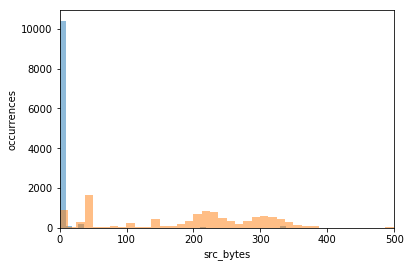

In [66]:
from matplotlib import pyplot as plt

# Parameters
thresh = 500  # we won't plot beyond src_bytes=500
bins = 40  # number of bins in the histograms

# Plot histograms
filtered_anomalies = [ x for x in anomalies.src_bytes if x < thresh ]
plt.hist(filtered_anomalies, alpha=0.5, label='anomalies', bins=bins)

filtered_normals = [ x for x in normals.src_bytes if x < thresh ]
plt.hist(filtered_normals, alpha=0.5, label='normals', bins=bins)

# Formatting
plt.xlim(0, thresh)
plt.xlabel('src_bytes')
plt.ylabel('occurrences')
plt.show()

<div class="alert alert-block alert-info">
<center>
It looks like the large majority of anomalies have <code>src_bytes</code> less than 30. A simple threshold should give good classification performance.
</center>

## A threshold-based classifier

<ul style="list-style-image: url('images/do.png');">
    <li>Starting from DataFrame <code>test</code>, create a <code>predictions</code> DataFrame where the prediction will be 1 (anomaly) if <code>src_bytes</code> &lt; 30, and 0 (normal) otherwise.</li>
</ul>

In [67]:
predictions = test.withColumn('prediction', col('src_bytes') < 30)\
                  .withColumn('prediction', col('prediction').cast("int") )
#predictions = test.withColumn('prediction', (col('src_bytes') < 30) ? 1 : 0)
predictions.show()

+---------+-------+-----+--------+----------+
|src_bytes|  class|label|features|prediction|
+---------+-------+-----+--------+----------+
|      0.0|anomaly|  1.0|   [0.0]|         1|
|      0.0|anomaly|  1.0|   [0.0]|         1|
|      0.0|anomaly|  1.0|   [0.0]|         1|
|      0.0|anomaly|  1.0|   [0.0]|         1|
|      0.0|anomaly|  1.0|   [0.0]|         1|
|      0.0|anomaly|  1.0|   [0.0]|         1|
|      0.0|anomaly|  1.0|   [0.0]|         1|
|      0.0|anomaly|  1.0|   [0.0]|         1|
|      0.0|anomaly|  1.0|   [0.0]|         1|
|      0.0|anomaly|  1.0|   [0.0]|         1|
|      0.0|anomaly|  1.0|   [0.0]|         1|
|      0.0|anomaly|  1.0|   [0.0]|         1|
|      0.0|anomaly|  1.0|   [0.0]|         1|
|      0.0|anomaly|  1.0|   [0.0]|         1|
|      0.0|anomaly|  1.0|   [0.0]|         1|
|      0.0|anomaly|  1.0|   [0.0]|         1|
|      0.0|anomaly|  1.0|   [0.0]|         1|
|      0.0|anomaly|  1.0|   [0.0]|         1|
|      0.0|anomaly|  1.0|   [0.0]|

<ul style="list-style-image: url('images/do.png');">
    <li>Compute the accuracy of this simple classifier.</li>
</ul>

In [69]:
correct = predictions.where(predictions['label'] == predictions['prediction']).count()
incorrect = predictions.where(predictions['label'] != predictions['prediction']).count()
accuracy = correct/(correct+incorrect)
print(f'Accuracy: {round(accuracy,2)}')

Accuracy: 0.92


<div class="alert alert-block alert-success">
<center>
The accuracy is close to the one obtained from Random Forests.<br/>
This reinforces our confidence in this result that initially looked too good to be true.
</center>
    </div>

## More numerical features

<div class="alert alert-block alert-info">
<center>
Many features remain unused, which suggests that our 0.9 accuracy result might still be improved. 
    </center>
    </div>

<ul style="list-style-image: url('images/do.png');">
    <li>Starting from the data preparation example in <a href="#preparation">Section 4.3</a>, prepare the dataset to use all the <b>numerical</b> features. Don't include categorical features for now.</li>
</ul>

In [70]:
# Read CSV data in a DataFrame
filename = 'data/session3/network_data.csv'
data = spark.read.option("header","true").csv(filename)

# Filter features
categorical_features = ['protocol_type', 'service', 'flag']
for f in categorical_features:
    data = data.drop(f)

# Cast numeric columns to float
from pyspark.sql.functions import col
data = data.select([col(col_name).cast("float") 
                    for col_name in data.columns if col_name != 'class'] + [ col('class') ])

# Stages
stages = []

from pyspark.ml.feature import StringIndexer
label_stringIdx = StringIndexer(inputCol = 'class', outputCol = 'label')
stages += [label_stringIdx]

from pyspark.ml.feature import VectorAssembler
assemblerInputs = [c for c in data.columns if c != 'class' and c != 'label']
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

# Transformation pipeline
from pyspark.ml import Pipeline
cols = data.columns
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(data)
transformed_data = pipelineModel.transform(data)
selectedCols = ['label', 'features'] + cols
transformed_data = transformed_data.select(selectedCols)
transformed_data.toPandas()

,label,features,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,"(0.0, 491.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",0.0,491.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150.0,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,"(0.0, 146.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",0.0,146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,1.0,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255.0,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.0,6.0,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255.0,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,"(0.0, 232.0, 8153.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,232.0,8153.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30.0,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,"(0.0, 199.0, 420.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1...",0.0,199.0,420.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,32.0,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,7.0,0.0,0.0,1.0,1.0,0.07,0.07,0.00,255.0,7.0,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,1.0,"(0.0, 334.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0...",0.0,334.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1.0,39.0,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.0,7.0,0.0,0.0,1.0,1.0,0.07,0.07,0.00,255.0,13.0,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129.0,18.0,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255.0,20.0,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


<ul style="list-style-image: url('images/do.png');">
    <li>Split the dataset in train (70%) and test (30%) sets</li>
    </ul>

In [71]:
# Train/test split
train, test = transformed_data.randomSplit([0.7, 0.3], seed=123)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 17546
Test Dataset Count: 7646


<ul style="list-style-image: url('images/do.png');">
    <li>Fit a Random Forest classifier on the training set and use it to make predictions on the test set</li>
    </ul>

In [72]:
# Classification and prediction
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label', numTrees=10)
rfModel = rf.fit(train)
predictions = rfModel.transform(test)
predictions.toPandas()

,label,features,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,rawPrediction,probability,prediction
0,0.0,"(16754.0, 3555.0, 198172.0, 0.0, 0.0, 0.0, 2.0...",16754.0,3555.0,198172.0,0.0,0.0,0.0,2.0,0.0,1.0,151.0,1.0,2.0,146.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.0,9.0,3.0,0.22,0.33,0.11,0.67,0.00,0.00,0.00,0.00,normal,"[7.608643727441476, 2.3913562725585233]","[0.7608643727441475, 0.23913562725585233]",0.0
1,0.0,"(5632.0, 3053.0, 439262.0, 0.0, 0.0, 0.0, 2.0,...",5632.0,3053.0,439262.0,0.0,0.0,0.0,2.0,0.0,1.0,193.0,0.0,1.0,191.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.0,121.0,26.0,0.21,0.05,0.01,0.00,0.01,0.04,0.02,0.08,normal,"[7.5805126483093614, 2.419487351690639]","[0.7580512648309361, 0.2419487351690639]",0.0
2,0.0,"(22.0, 332.0, 1054.0, 0.0, 0.0, 0.0, 6.0, 0.0,...",22.0,332.0,1054.0,0.0,0.0,0.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.5,1.00,0.0,246.0,44.0,0.18,0.03,0.00,0.00,0.00,0.00,0.00,0.00,normal,"[9.012177909066576, 0.9878220909334242]","[0.9012177909066577, 0.09878220909334243]",0.0
3,0.0,"(25.0, 241.0, 777.0, 0.0, 0.0, 0.0, 4.0, 0.0, ...",25.0,241.0,777.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.5,1.00,0.0,163.0,34.0,0.21,0.04,0.01,0.00,0.01,0.00,0.00,0.00,normal,"[9.012177909066576, 0.9878220909334242]","[0.9012177909066577, 0.09878220909334243]",0.0
4,0.0,"(27.0, 1489.0, 4152.0, 0.0, 0.0, 0.0, 30.0, 0....",27.0,1489.0,4152.0,0.0,0.0,0.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.5,1.00,0.0,171.0,36.0,0.21,0.04,0.01,0.00,0.01,0.00,0.00,0.00,normal,"[9.017730866078642, 0.9822691339213601]","[0.901773086607864, 0.09822691339213599]",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7641,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,238.0,1.0,0.0,0.0,1.0,1.0,0.0,0.07,0.0,255.0,1.0,0.00,0.08,0.00,0.00,0.00,0.00,1.00,1.00,anomaly,"[0.08701221170674901, 9.91298778829325]","[0.008701221170674902, 0.991298778829325]",1.0
7642,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,241.0,1.0,0.0,0.0,1.0,1.0,0.0,0.07,0.0,255.0,1.0,0.00,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly,"[0.08701221170674901, 9.91298778829325]","[0.008701221170674902, 0.991298778829325]",1.0
7643,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,242.0,1.0,0.0,0.0,1.0,1.0,0.0,0.07,0.0,255.0,1.0,0.00,0.08,0.00,0.00,0.00,0.00,1.00,1.00,anomaly,"[0.08701221170674901, 9.91298778829325]","[0.008701221170674902, 0.991298778829325]",1.0
7644,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.0,60.0,5.0,0.02,1.00,0.02,0.40,0.00,0.00,0.92,0.00,anomaly,"[3.9406097778501494, 6.05939022214985]","[0.3940609777850149, 0.605939022214985]",1.0


<ul style="list-style-image: url('images/do.png');">
    <li>Evaluate the accuracy of your classifier</li>
    </ul>

In [74]:
# Evaluation
correct = predictions.where(predictions['label'] == predictions['prediction']).count()
incorrect = predictions.where(predictions['label'] != predictions['prediction']).count()
accuracy = correct/(correct+incorrect)
print(f'Prediction accuracy: {round(accuracy,5)}')

Prediction accuracy: 0.98365


<div class="alert alert-block alert-success">
<center>
As expected, accuracy improved substantially by adding more features. <br/>
    This won't always be the case, finding the best features is called <b>feature engineering</b>.
</center>
    </div>

## Categorical features

<div class="alert alert-block alert-info">
<center>
Categorical features need to be encoded as numbers to be used by Spark MLlib classifiers.<br/>Here we will use a popular encoding method called <b>one-hot encoding</b>.
</center>
    </div>

First, let's re-load the data, cast the numerical features to floats, and index the class column:

In [82]:
# Read CSV data in a DataFrame
filename = 'data/session3/network_data.csv'
data = spark.read.option("header","true").csv(filename)
    
numeric_features = [ x for x in data.columns if x not in categorical_features and x != 'class' ]

# Cast numeric columns to float
from pyspark.sql.functions import col
data = data.select([col(col_name).cast("float") 
                    for col_name in data.columns if col_name != 'class' and col_name not in categorical_features]\
                   + [ col('class') ]
                   + categorical_features)

# Stages
stages = []

# Index class 
from pyspark.ml.feature import StringIndexer
label_stringIdx = StringIndexer(inputCol = 'class', outputCol = 'label')
stages += [label_stringIdx]



We will implement one-hot encoding by adding two steps to the MLlib pipeline, **for each categorical variable**:
1. A ```StringIndexer```, to convert categorical values to integers
2. A ```OneHotEncoder```, to represent these integers as non-ordinal bits

<ul style="list-style-image: url('images/do.png');">
    <li>Define the pipeline stages to transform categorical features using <code>StringIndexer</code> and <code>OneHotEncoder</code> from <code>pyspark.ml.feature</code></li>
    </ul>

In [83]:
# Index categorical features and encode them with one-hot encoding
for c in categorical_features:
    stringIndexer = StringIndexer(inputCol = c, outputCol = c + 'Index')
    from pyspark.ml.feature import OneHotEncoder
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[c + "classVec"])
    stages += [stringIndexer, encoder]

<ul style="list-style-image: url('images/do.png');">
    <li>Define the pipeline stage to create column <code>features</code> using <code>VectorAssembler</code> from <code>pyspark.ml.feature</code></li>
    </ul>

In [84]:
# Create column features
from pyspark.ml.feature import VectorAssembler
assemblerInputs = numeric_features + [c + "classVec" for c in categorical_features]
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

<ul style="list-style-image: url('images/do.png');">
    <li>Apply the transformation pipeline to the dataset</li>
    </ul>

In [85]:
# Transformation pipeline
from pyspark.ml import Pipeline
cols = data.columns
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(data)
transformed_data = pipelineModel.transform(data)
selectedCols = ['label', 'features'] + cols
transformed_data = transformed_data.select(selectedCols)
transformed_data.toPandas()

,label,features,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,protocol_type,service,flag
0,0.0,"(0.0, 491.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",0.0,491.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150.0,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,tcp,ftp_data,SF
1,0.0,"(0.0, 146.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",0.0,146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,1.0,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255.0,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,udp,other,SF
2,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.0,6.0,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255.0,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly,tcp,private,S0
3,0.0,"(0.0, 232.0, 8153.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,232.0,8153.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30.0,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,tcp,http,SF
4,0.0,"(0.0, 199.0, 420.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1...",0.0,199.0,420.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,32.0,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,tcp,http,SF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,7.0,0.0,0.0,1.0,1.0,0.07,0.07,0.00,255.0,7.0,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly,tcp,exec,RSTO
25188,1.0,"(0.0, 334.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0...",0.0,334.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1.0,39.0,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly,tcp,ftp_data,SF
25189,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.0,7.0,0.0,0.0,1.0,1.0,0.07,0.07,0.00,255.0,13.0,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly,tcp,private,REJ
25190,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129.0,18.0,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255.0,20.0,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly,tcp,nnsp,S0


<ul style="list-style-image: url('images/do.png');">
    <li>Split the dataset in train (70%) and test (30%) sets</li>
    </ul>

In [86]:
# Train/test split
train, test = transformed_data.randomSplit([0.7, 0.3], seed=123)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 17546
Test Dataset Count: 7646


<ul style="list-style-image: url('images/do.png');">
    <li>Fit a Random Forest classifier on the training set and use it to make predictions on the test set</li>
    </ul>

In [87]:
# Classification and prediction
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label', numTrees=10)
rfModel = rf.fit(train)
predictions = rfModel.transform(test)
predictions.toPandas()

,label,features,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,protocol_type,service,flag,rawPrediction,probability,prediction
0,0.0,"(16754.0, 3555.0, 198172.0, 0.0, 0.0, 0.0, 2.0...",16754.0,3555.0,198172.0,0.0,0.0,0.0,2.0,0.0,1.0,151.0,1.0,2.0,146.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,0.0,9.0,3.0,0.22,0.33,0.11,0.67,0.00,0.00,0.00,0.00,normal,tcp,telnet,SF,"[6.949168906530363, 3.0508310934696357]","[0.6949168906530364, 0.30508310934696364]",0.0
1,0.0,"(5632.0, 3053.0, 439262.0, 0.0, 0.0, 0.0, 2.0,...",5632.0,3053.0,439262.0,0.0,0.0,0.0,2.0,0.0,1.0,193.0,0.0,1.0,191.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,0.0,121.0,26.0,0.21,0.05,0.01,0.00,0.01,0.04,0.02,0.08,normal,tcp,telnet,SF,"[7.033365717862557, 2.966634282137442]","[0.7033365717862559, 0.29666342821374425]",0.0
2,0.0,"(23.0, 287.0, 892.0, 0.0, 0.0, 0.0, 5.0, 0.0, ...",23.0,287.0,892.0,0.0,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.33,0.67,0.0,138.0,26.0,0.19,0.09,0.01,0.00,0.02,0.00,0.00,0.00,normal,tcp,ftp,SF,"[8.109345287234348, 1.8906547127656543]","[0.8109345287234346, 0.1890654712765654]",0.0
3,0.0,"(28.0, 1498.0, 4152.0, 0.0, 0.0, 0.0, 30.0, 0....",28.0,1498.0,4152.0,0.0,0.0,0.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.50,1.00,0.0,76.0,10.0,0.13,0.04,0.01,0.00,0.00,0.00,0.00,0.00,normal,tcp,ftp,SF,"[8.188487248855841, 1.8115127511441604]","[0.8188487248855839, 0.181151275114416]",0.0
4,0.0,"(27.0, 246.0, 772.0, 0.0, 0.0, 0.0, 4.0, 0.0, ...",27.0,246.0,772.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.50,1.00,0.0,251.0,44.0,0.18,0.03,0.00,0.00,0.01,0.00,0.00,0.00,normal,tcp,ftp,SF,"[9.07363100152006, 0.9263689984799401]","[0.9073631001520059, 0.09263689984799402]",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7641,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,218.0,1.0,0.0,0.0,1.0,1.0,0.00,0.07,0.0,255.0,1.0,0.00,0.09,0.00,0.00,0.00,0.00,1.00,1.00,anomaly,tcp,supdup,REJ,"[0.058740223854455424, 9.941259776145545]","[0.005874022385445542, 0.9941259776145545]",1.0
7642,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,246.0,1.0,0.0,0.0,1.0,1.0,0.00,0.07,0.0,255.0,1.0,0.00,0.08,0.00,0.00,0.00,0.00,1.00,1.00,anomaly,tcp,vmnet,REJ,"[0.058740223854455424, 9.941259776145545]","[0.005874022385445542, 0.9941259776145545]",1.0
7643,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,236.0,1.0,0.0,0.0,1.0,1.0,0.00,0.07,0.0,255.0,1.0,0.00,0.08,0.00,0.00,0.00,0.00,1.00,1.00,anomaly,tcp,discard,RSTO,"[0.4325081938717961, 9.567491806128203]","[0.04325081938717962, 0.9567491806128204]",1.0
7644,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,0.0,60.0,5.0,0.02,1.00,0.02,0.40,0.00,0.00,0.92,0.00,anomaly,tcp,finger,SF,"[3.6869511941302298, 6.313048805869771]","[0.36869511941302296, 0.6313048805869771]",1.0


<ul style="list-style-image: url('images/do.png');">
    <li>Evaluate the accuracy of your classifier</li>
    </ul>

In [88]:
# Evaluation
correct = predictions.where(predictions['label'] == predictions['prediction']).count()
incorrect = predictions.where(predictions['label'] != predictions['prediction']).count()
accuracy = correct/(correct+incorrect)
print(f'Prediction accuracy: {round(accuracy,2)}')

Prediction accuracy: 0.97


<div class="alert alert-block alert-success">
<center>
Not much improvement was brought by categorical variables
</center>
    </div>

# Recap


<div class="alert alert-block alert-success">
<center>
    </center>
    &#x2611; Get familiar with <b>supervised classification</b><br/>
    &#x2611; Try <b>Spark's MLlib classification</b> library <br/>
    &#x2611; Apply supervised classification to <b>network intrusion detection</b><br/>
    &#x2611; Practice with Spark <b>DataFrames</b>
</div>
